# 音频特征

**简明总结（TL;DR）**

- **音频特征** 是音频信号中可测量的属性，可用于描述和分析声音。
- 特征可以捕捉音频的不同方面：
    - **时域特征**
    - **频域特征**
    - **感知特征**
    - **音乐相关特征**
- 提取的特征可以用于多种任务，例如：
    - 分类（Classification）
    - 识别（Recognition）
    - 分词（Tokenization）
    - 生成（Generation）

- **本教程内容包括：**
    - 加载和可视化音频文件
    - **时域特征**：
        - 均方根能量（RMS Energy）
        - 过零率（Zero Crossing Rate）
    - **频域特征**：
        - 短时傅里叶变换（STFT）
        - 谱质心（Spectral Centroid）
        - 谱滚降点（Spectral Rolloff）
    - **梅尔频率倒谱系数**（MFCCs）
    - **色度特征**（Chroma Features，用于音乐分析）

通过本教程的学习，你将掌握如何使用 Python 和 librosa 提取并解释各种音频特征。

## 前述

想象一下，你是一个音乐爱好者，拥有大量歌曲。你可以轻松地区分不同的音乐风格、识别乐器，甚至仅凭听觉就能认出特定的艺术家。但如何教会计算机也做到这一点呢？这就需要用到**音频特征提取**。

为了让统计模型或机器学习模型理解音频，我们需要将音频数据转换为模型可以处理的格式。这就像在教计算机以**我们**的方式来“听”音乐或声音。

音频特征提取是任何音频相关任务中必不可少的一步。它指的是分析音频信号，从中提取出对各种应用有意义的信息的过程。可以把它看作是把复杂的声音世界分解成更简单、可测量的组成部分。

## 音频特征有哪些不同类型？

音频特征可以大致分为几类。我们来逐一介绍：

- **时域特征（Time-domain features）：** 这些特征直接从音频信号的波形中提取。

  想象你正在观察一条河流。波浪的高度（振幅）和它们出现的频率可以告诉你很多关于水流的信息。同样地，时域特征如 *振幅包络（Amplitude Envelope）、均方根能量（Root Mean Square, RMS Energy）和过零率（Zero-crossing Rate, ZCR）* 能够告诉我们音频信号随时间变化的行为特征。

- **频域特征（Frequency-domain features）：** 这些特征是从音频信号的频率表示中提取出来的。

  想象一个由不同声部组成的合唱团——男低音、男高音、女高音和女低音。每个声部占据不同的频率范围。频域特征帮助我们理解音频中存在哪些“声音”或频率，以及它们的强度如何。例如：
    - **谱质心（Spectral Centroid）**
    - **谱滚降点（Spectral Rolloff）**
    - **谱通量（Spectral Flux）**
    - **谱带宽（Spectral Bandwidth）**

- **时频域特征（Time-frequency domain features）：** 这些特征同时表示音频的时间和频率特性。

  想象你在慢动作下观看一部电影。你可以看到场景如何随时间变化，以及不同颜色（频率）如何出现和消失。时频域特征如 *短时傅里叶变换（Short-time Fourier Transform, STFT）、梅尔频率倒谱系数（Mel-frequency Cepstral Coefficients, MFCCs）和恒Q变换（Constant-Q Transform）* 就是用来捕捉这种时间与频率之间动态关系的。

在深入探讨音频特征及其提取方法之前，我们需要先了解如何处理音频数据。在下一节中，我们将介绍音频数据的基本表示方式，并学习如何在 Python 中加载和可视化音频文件。

In [1]:
# Import necessary libraries
import numpy as np # Numerical computing and array operations
import librosa # Audio and music processin
import librosa.display # Data visualization
import matplotlib.pyplot as plt
import IPython.display as ipd # Interactive display of audio in Jupyter notebooks
from scipy.io import wavfile # Audio file I/O operations
import pandas as pd # Data manipulation and analysis


Now that we have our libraries imported and a comprehensive understanding of audio feature extraction, let's proceed to load and visualize an audio file in the next section.

## 加载和可视化音频文件

在深入特征提取之前，理解音频数据是至关重要的。在本节中，我们将探讨如何加载音频文件、查看其属性，并以多种方式对其进行可视化。这一过程有助于我们深入了解音频信号的特性，并为后续的特征提取做好准备。

In [8]:
# Load an audio file
audio_path = librosa.example('trumpet') # You can use a sample audio file from librosa
# audio_path = "path/to/your/audio/file.wav" # Or replace with your audio file
y, sr = librosa.load(audio_path)#, sr=11111)

让我们来分解一下这里发生了什么：

- `librosa.load()` 会读取音频文件，并返回两个变量：
  - `y`：作为 NumPy 数组的音频时间序列
  - `sr`：音频的采样率

默认情况下，librosa 会将音频重采样到 22050 Hz。你可以通过设置 `sr=None` 来使用文件原本的采样率，或者指定一个不同的采样率。

### 理解音频属性

现在我们已经加载了音频文件，接下来让我们查看它的基本属性。

In [9]:
# Display basic information about the audio file
duration = librosa.get_duration(y=y, sr=sr)
print(f"Audio duration: {duration:.2f} seconds")
print(f"Sample rate: {sr} Hz")
print(f"Number of samples: {len(y)}")
print(f"Shape of audio array: {y.shape}")

Audio duration: 5.33 seconds
Sample rate: 22050 Hz
Number of samples: 117601
Shape of audio array: (117601,)


这些属性告诉我们：

- **时长（Duration）**：音频的长度，以秒为单位  
- **采样率（Sample rate）**：每秒的采样点数（librosa 默认是 22050 Hz）  
- **样本数量（Number of samples）**：音频信号中总的数据点数  
- **形状（Shape）**：NumPy 数组的维度（单声道音频应为一维）

### 播放音频

在分析音频时，直接聆听音频通常很有帮助。在 Jupyter Notebook 中，我们可以使用 `IPython.display.Audio` 来在笔记本中直接播放音频。

In [10]:
# Play the audio file
ipd.display(ipd.Audio(y, rate=sr))

### 可视化波形

波形是音频信号的基本可视化表示。它展示了信号的振幅随时间的变化情况。

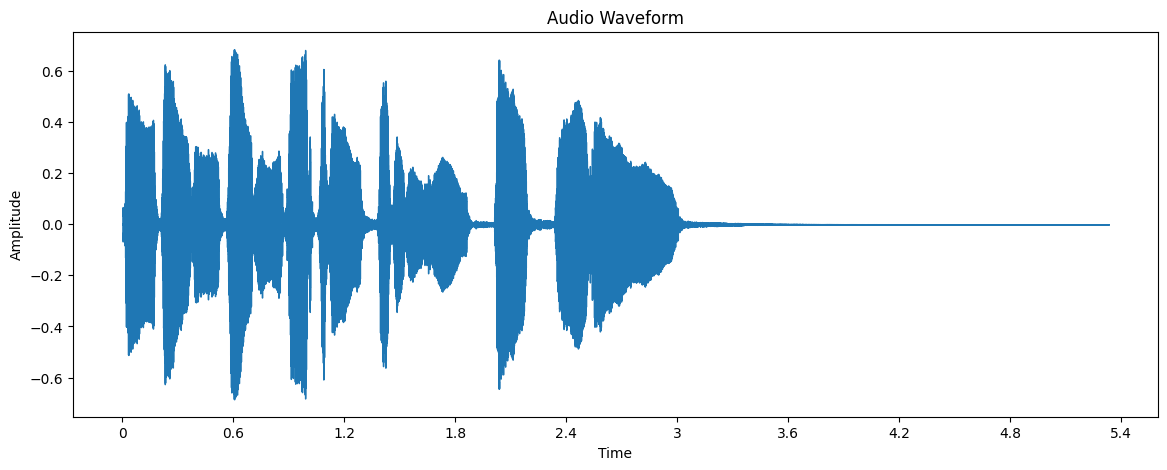

In [11]:
# Visualize the waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

以下是波形图的解读方式：

- x 轴表示时间  
- y 轴表示信号的振幅  
- 音量较大的部分会有更大的振幅（更高的波峰）  
- 音量较小的部分则更接近中心线  

### 可视化频谱图

虽然波形展示了振幅随时间的变化，但**频谱图**（spectrogram）展示了音频信号的频率成分如何随时间变化。它是一个二维的表示方式：

- x 轴表示时间  
- y 轴表示频率  
- 颜色代表每个时间点上各个频率的强度  

![短时傅里叶变换（STFT）流程图](https://ravinkumar.com/GenAiGuidebook/_images/stft_flowchart.png)

为了计算频谱图，我们使用**短时傅里叶变换**（Short-Time Fourier Transform, STFT）。STFT 将音频信号分成一系列重叠的短帧，并对每一帧进行傅里叶变换。这样我们就得到了一个随时间变化的频率表示，从而能够观察音频中不同时间点的频率成分。

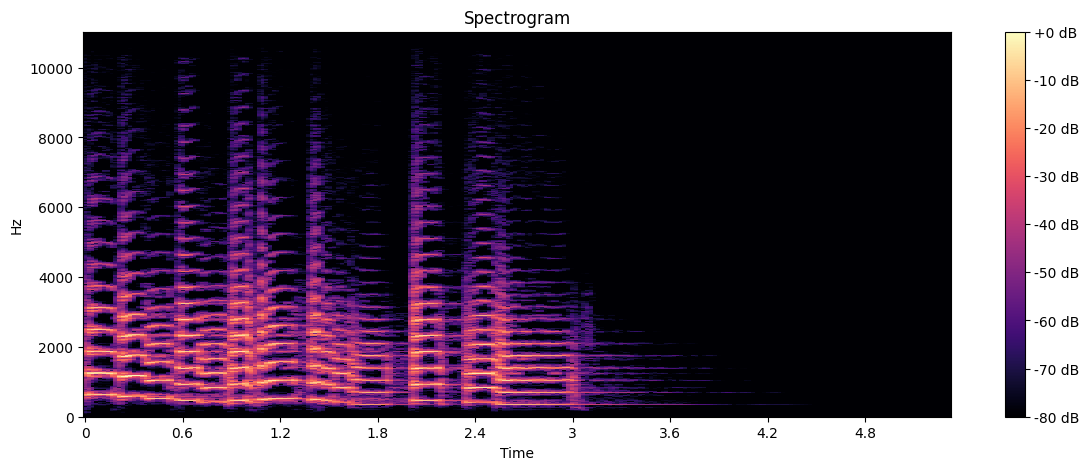

In [12]:
# Compute the spectrogram
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)  # Convert to dB scale

# Display the spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

以下是频谱图的解读方式：

- x 轴表示时间  
- y 轴表示频率  
- 颜色的深浅表示每个时间点上各个频率的振幅大小  
- 更明亮的颜色表示更高的振幅  
- 这种可视化方式有助于识别主要频率、谐波，以及频率成分随时间的变化情况

### 可视化梅尔频谱图

梅尔频谱图（Mel spectrogram）与普通频谱图类似，但它的频率轴被转换为梅尔刻度（Mel scale），这种刻度更贴近人类听觉的感知方式。

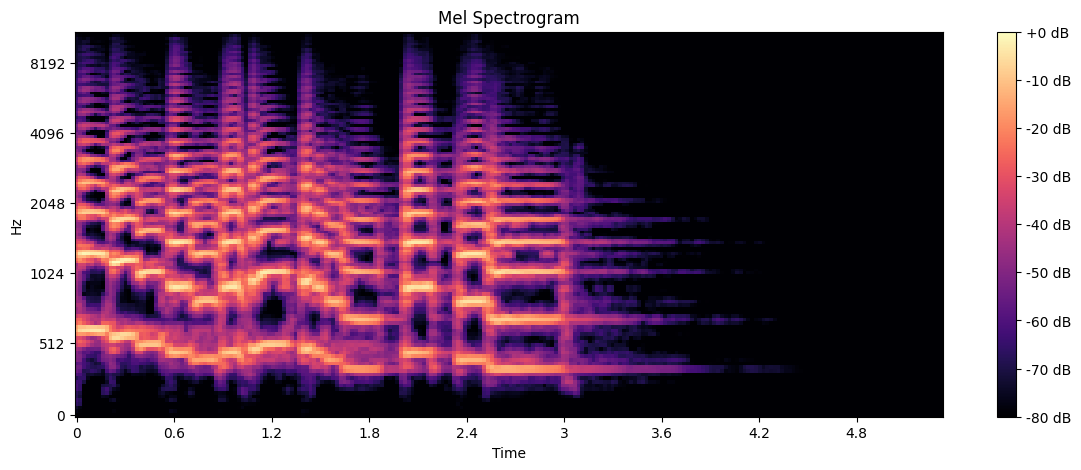

In [13]:
# Compute the mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db_mel = librosa.power_to_db(S, ref=np.max)

# Display the mel spectrogram
plt.figure(figsize=(14, 5))
librosa.display.specshow(S_db_mel, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

梅尔频谱图：

- 提供了一种更接近人类听觉感知方式的音频表示  
- 在音频分类任务中常被用作机器学习模型的输入  

### 本节小结

在本节中，我们学习了如何：

- 使用 librosa 加载音频文件  
- 查看音频的基本属性  
- 在 Jupyter Notebook 中播放音频  
- 将音频可视化为波形图  
- 创建并解读频谱图和梅尔频谱图

## 时域特征

时域特征是从音频波形中直接提取的。这些特征捕捉音频信号的时间特性，并且通常计算效率较高。在本节中，我们将探讨两个重要的时域特征：均方根能量（Root Mean Square, RMS Energy）和过零率（Zero Crossing Rate, ZCR）。

### 均方根能量（RMS Energy）

RMS 能量是**衡量信号随时间变化的整体能量或音量的指标。它能提供关于音频信号振幅变化的信息**。

数学定义如下：

$$
\text{RMS} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} x_i^2}
$$

其中 $x_i$ 是样本值，$N$ 是当前帧中的样本数量。

现在我们来计算并可视化 RMS 能量：

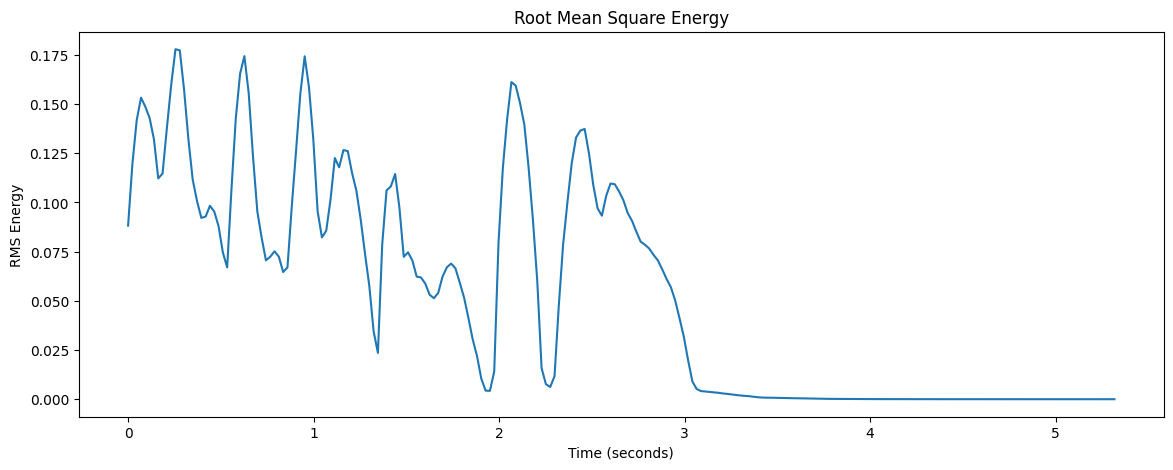

In [14]:
# Calculate RMS energy
frame_length = 2048
hop_length = 512
rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)

# Plot RMS energy
plt.figure(figsize=(14, 5))
times = librosa.times_like(rms, sr=sr, hop_length=hop_length)
plt.plot(times, rms[0])
plt.title("Root Mean Square Energy")
plt.xlabel("Time (seconds)")
plt.ylabel("RMS Energy")
plt.show()

以下是 RMS 能量图的解读方式：

- x 轴表示时间（秒）  
- y 轴表示 RMS 能量值  
- 较高的值表示音频中音量较大的片段  
- 较低的值表示音频中较安静的片段  

RMS 能量是许多音频分析任务中有用的特征，例如：

- 检测语音中的静音或停顿  
- 在音乐中识别响亮的部分以进行节拍检测  
- 根据能量水平对音频进行分段  
- 在语音处理中进行语音活动检测

### 过零率（Zero Crossing Rate, ZCR）

过零率是指**信号从正变负或从负变正的频率**。它**提供了关于信号频率内容的信息，尤其在区分音乐中的打击乐声音与和声声音、以及语音中辅音与元音时非常有用**。

数学定义如下：

$$
ZCR = \frac{1}{N-1} \sum_{i=1}^{N-1} \frac{\left| \text{sign}(x[i]) - \text{sign}(x[i-1]) \right|}{2}
$$

其中 $x[i]$ 是第 $i$ 个样本处的信号值，$N$ 是总样本数。

现在我们来计算并可视化过零率：

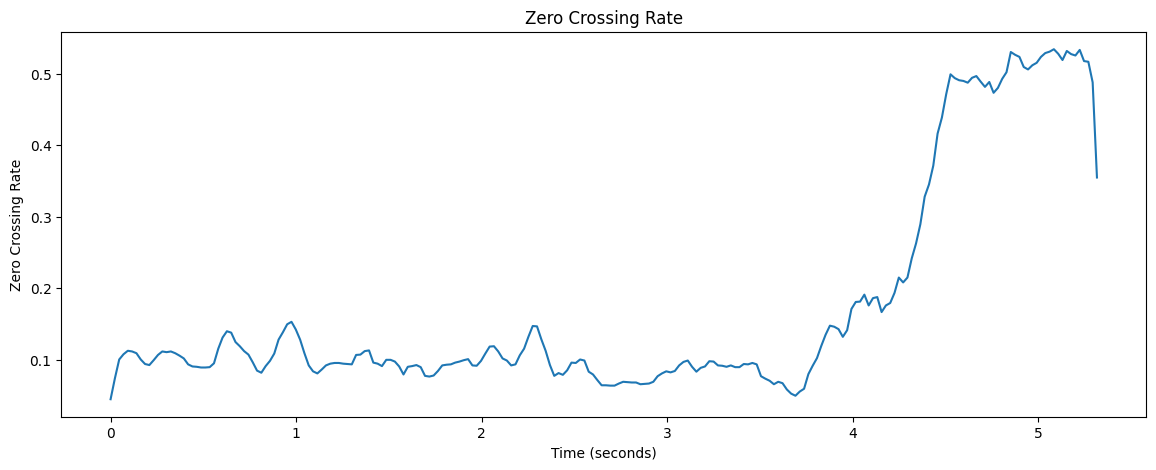

In [15]:
# Calculate Zero Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y, frame_length=frame_length, hop_length=hop_length)

# Plot Zero Crossing Rate
plt.figure(figsize=(14, 5))
times = librosa.times_like(zcr, sr=sr, hop_length=hop_length)
plt.plot(times, zcr[0])
plt.title("Zero Crossing Rate")
plt.xlabel("Time (seconds)")
plt.ylabel("Zero Crossing Rate")
plt.show()

如何解读过零率（ZCR）图：

- x 轴表示时间（秒）。  
- y 轴表示过零率。  
- 较高的值表示信号符号变化更频繁，通常与高频或噪声相关。  
- 较低的值则表明频率较低或声音更具音调特征。

过零率的应用包括：

- 语音/音乐区分  
- 语音活动检测  
- 音乐流派分类  
- 音乐分析中的起始点检测  

### 结合 RMS 能量和过零率

通常，将这两个特征结合在一起观察会更有启发性。这有助于我们了解音频信号的能量特性和频率特性之间如何相互关联，并与原始波形进行对比。

现在我们来绘制一个综合图表：

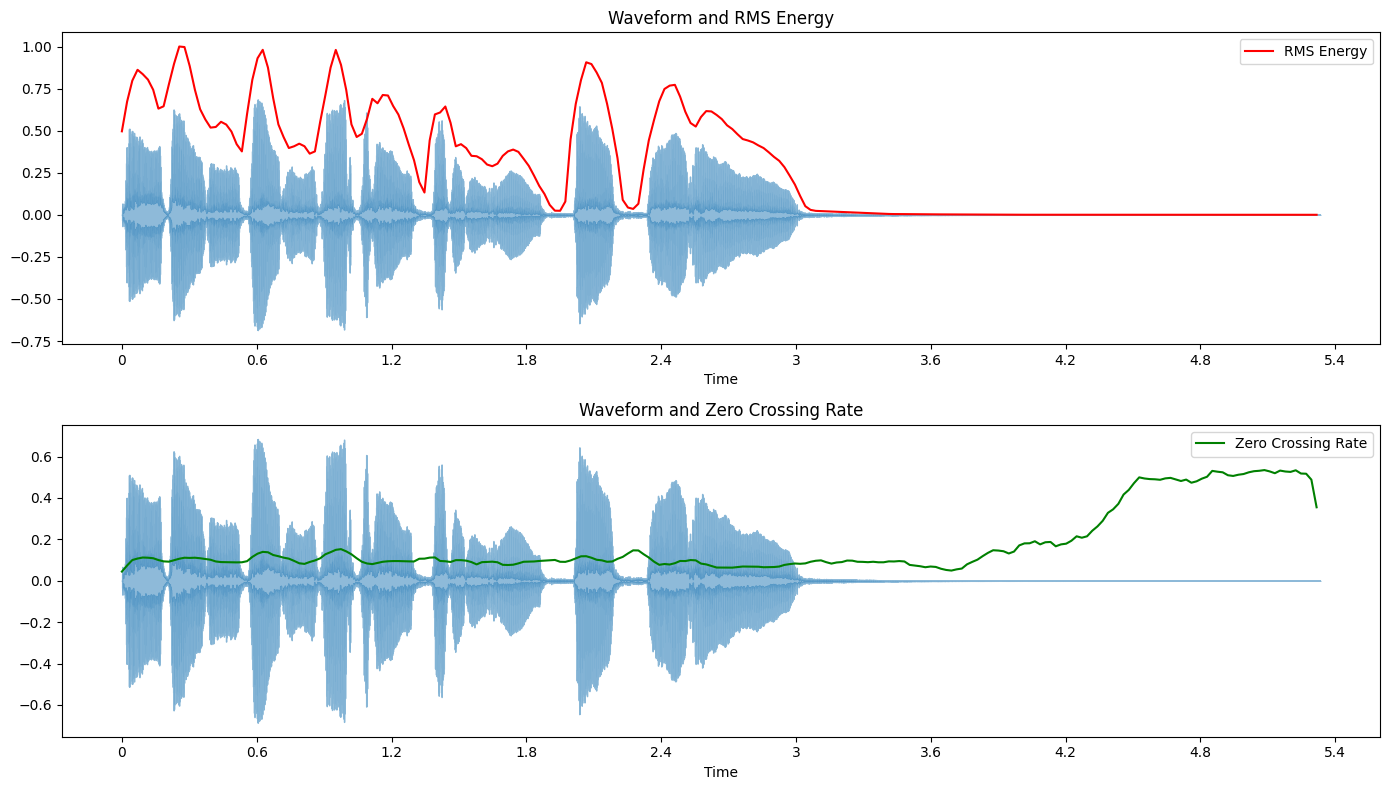

In [16]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(times, rms[0] / rms.max(), color='r', label='RMS Energy')
plt.title("Waveform and RMS Energy")
plt.legend()

plt.subplot(2, 1, 2)
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(times, zcr[0], color='g', label='Zero Crossing Rate')
plt.title("Waveform and Zero Crossing Rate")
plt.legend()

plt.tight_layout()
plt.show()

这种综合可视化使我们能够看到 RMS 能量和过零率如何与原始波形以及彼此之间相关联。

### 特征统计

虽然这些特征的时间序列本身具有信息价值，但在将其用于机器学习模型时，我们通常需要对其进行汇总。现在我们来计算一些基本的统计指标：

In [17]:
# Calculate statistics
rms_mean = np.mean(rms)
rms_std = np.std(rms)
zcr_mean = np.mean(zcr)
zcr_std = np.std(zcr)

print(f"RMS Energy - Mean: {rms_mean:.4f}, Std Dev: {rms_std:.4f}")
print(f"Zero Crossing Rate - Mean: {zcr_mean:.4f}, Std Dev: {zcr_std:.4f}")

RMS Energy - Mean: 0.0529, Std Dev: 0.0553
Zero Crossing Rate - Mean: 0.1735, Std Dev: 0.1522


### 本节小结

在本节中，我们探讨了两个基本的时域特征：

- **均方根能量（Root Mean Square, RMS Energy）**：衡量信号随时间变化的音量大小。
- **过零率（Zero Crossing Rate, ZCR）**：衡量信号符号变化频率的指标。

这些特征提供了关于音频信号时间特性的有价值信息，并常作为更广泛特征集合的一部分，用于各种音频分析任务。它们计算效率高，特别适用于实时应用。

我们学习了如何计算、可视化并汇总这些时域特征。

在接下来的章节中，我们将探索频域特征，这将为我们提供关于音频信号频谱特性的不同视角。

## 频域特征

虽然时域特征能够让我们了解音频信号的时间特性，但频域特征则提供了关于信号频谱内容的信息。这些特征在诸如音乐分析、流派分类和语音识别等任务中往往更加有信息量。

在本节中，我们将探讨三个重要的频域特征：

- **短时傅里叶变换（Short-time Fourier Transform, STFT）**
- **谱质心（Spectral Centroid）**
- **谱滚降点（Spectral Rolloff）**

### 短时傅里叶变换（STFT）

**短时傅里叶变换**（STFT）是音频信号处理中的基础工具。它通过对信号的小段重叠部分应用傅里叶变换，使我们能够分析频率成分如何随时间变化。

现在我们来计算并可视化 STFT：

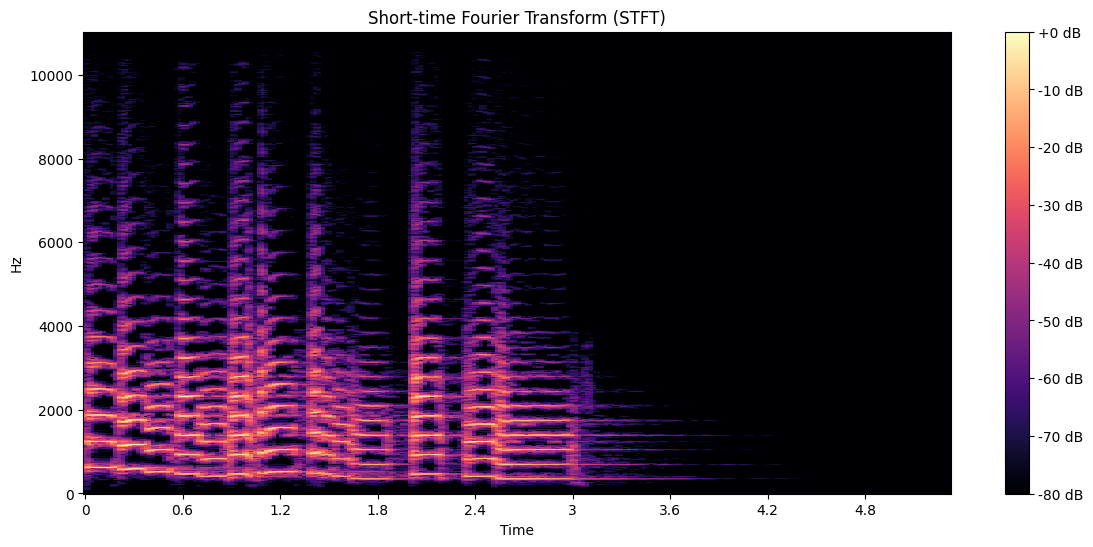

In [18]:
# Compute STFT
n_fft = 2048
hop_length = 512
D = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

# Convert to dB scale
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Visualize the spectrogram
plt.figure(figsize=(14, 6))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('Short-time Fourier Transform (STFT)')
plt.show()


以下是 STFT 频谱图的解读方式：

- x 轴表示时间。  
- y 轴表示频率。  
- 颜色的强度表示每个时间点上各个频率成分的幅度大小。  
- 更明亮的颜色表示在该时间点某个频率的存在更强烈。

STFT 是一个功能强大的工具，具有多种应用，包括：

- 识别音频中不同部分的主要频率  
- 分析音乐中的谐波结构  
- 检测随时间变化的音高  
- 作为许多其他音频特征和处理技术的基础  

### 谱质心（Spectral Centroid）

**谱质心**是频谱的“重心”或“质量中心”的度量。它表示声音在频率轴上的“中心”位置。从感知角度来看，它与声音“明亮度”的印象密切相关。

数学定义如下：

$$
\text{谱质心} = \frac{\sum (f \cdot m(f))}{\sum m(f)}
$$

其中 $f$ 是频率，$m(f)$ 是该频率下的频谱幅度。

现在我们来计算并可视化谱质心：

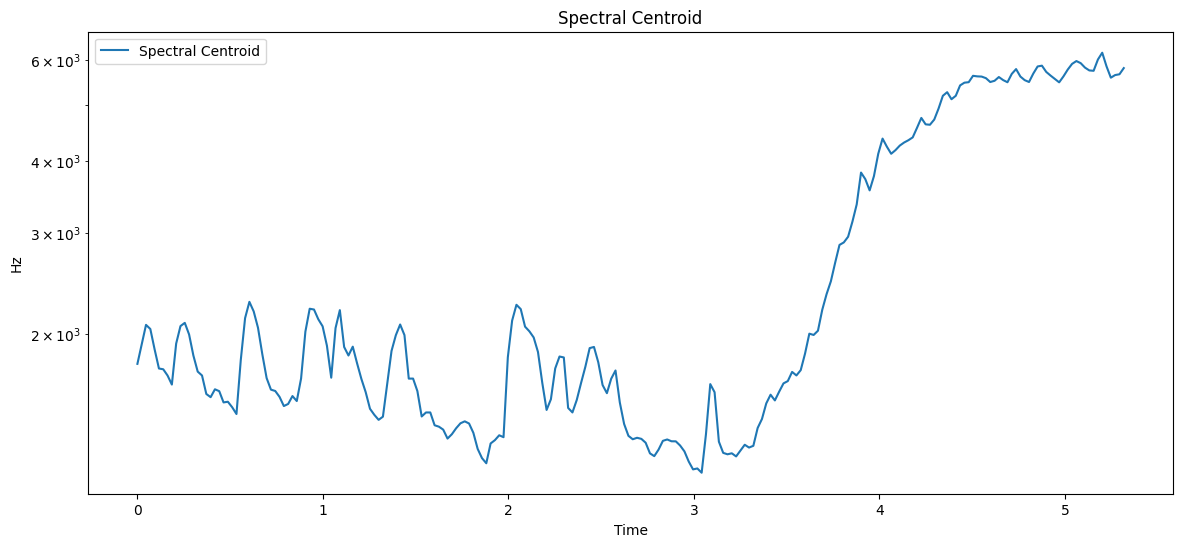

In [19]:
# Compute spectral centroid
centroid = librosa.feature.spectral_centroid(y=y, sr=sr, hop_length=hop_length)

# Visualize spectral centroid
plt.figure(figsize=(14, 6))
times = librosa.times_like(centroid, sr=sr, hop_length=hop_length)
plt.semilogy(times, centroid[0], label='Spectral Centroid')
plt.ylabel('Hz')
plt.xlabel('Time')
plt.legend()
plt.title('Spectral Centroid')
plt.show()

如何解读谱质心图：

- x 轴表示时间。  
- y 轴表示频率（单位为 Hz），通常以对数刻度显示。  
- 较高的值表示声音更“明亮”，含有更多高频成分。  
- 较低的值表示声音更“暗沉”，含有更多低频成分。

谱质心的应用包括：

- 音乐中的音色分析  
- 乐器分类  
- 音频均衡和滤波  
- 语音分析中的语音质量评估  

### 谱滚降点（Spectral Rolloff）

**谱滚降点**是指在该频率以下，包含了总频谱能量的某个百分比（通常是 85% 或 95%）。它是另一个衡量声音频谱形状的指标。

现在我们来计算并可视化谱滚降点：

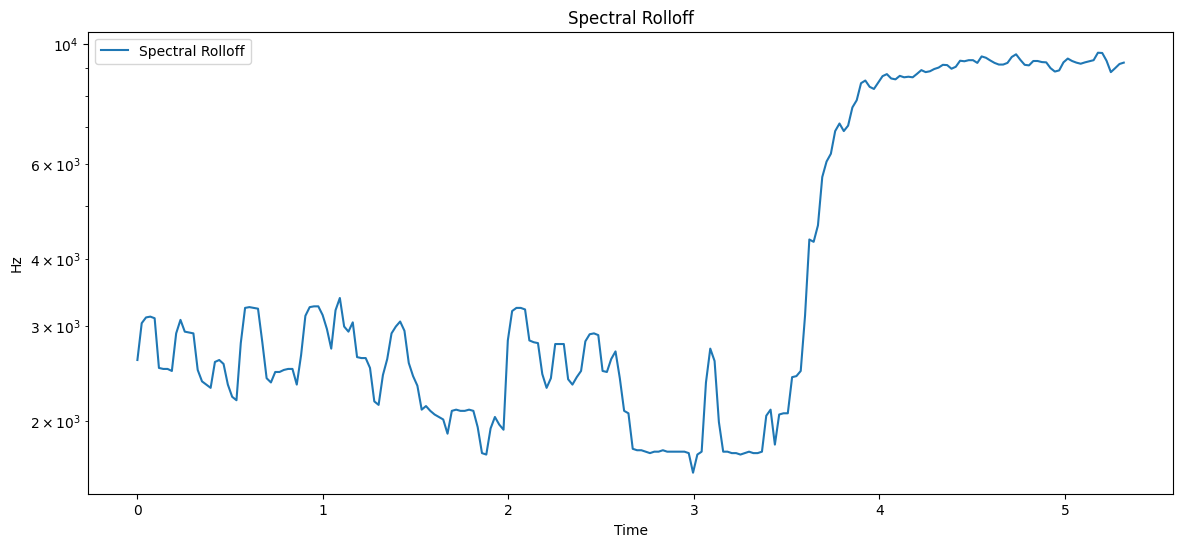

In [20]:
# Compute spectral rolloff
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, hop_length=hop_length)

# Visualize spectral rolloff
plt.figure(figsize=(14, 6))
times = librosa.times_like(rolloff, sr=sr, hop_length=hop_length)
plt.semilogy(times, rolloff[0], label='Spectral Rolloff')
plt.ylabel('Hz')
plt.xlabel('Time')
plt.legend()
plt.title('Spectral Rolloff')
plt.show()

如何解读谱滚降点图：

- x 轴表示时间。  
- y 轴表示频率（单位为 Hz），通常以对数刻度显示。  
- 图中的线表示在每个时间点，85%（默认值）的频谱能量集中在该频率以下。  
- 更高的值表示音频中包含更多高频成分。

谱滚降点的一些应用包括：

- 区分语音中的浊音和清音  
- 音乐流派分类  
- 音频分段  
- 检测音频中的突变频谱变化  

### 综合频域特征

为了全面了解音频的频谱特性，让我们将这些特征可视化在一起：

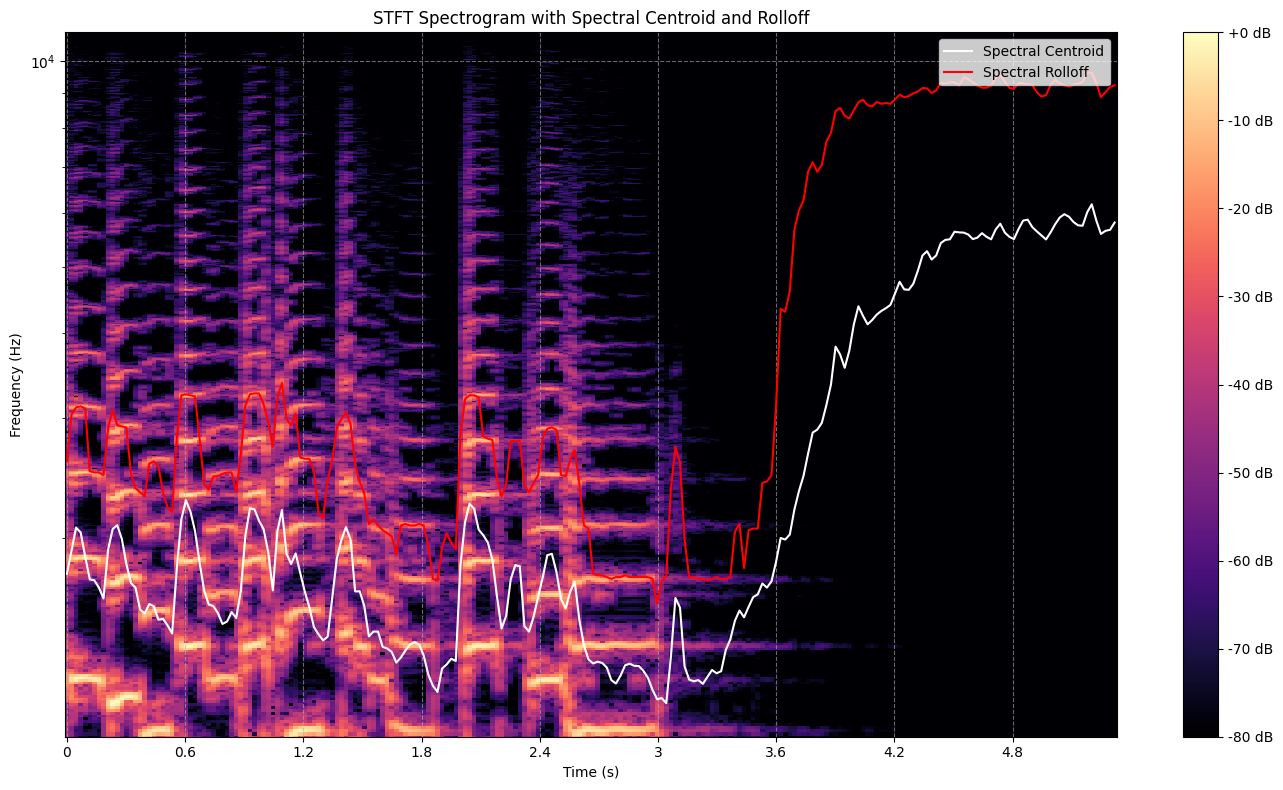

In [21]:
plt.figure(figsize=(14, 8))

# Plot spectrogram
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log', hop_length=hop_length)
plt.colorbar(format='%+2.0f dB')
plt.title('STFT Spectrogram with Spectral Centroid and Rolloff')

# Plot spectral centroid on top of the spectrogram
plt.semilogy(times, centroid[0], label='Spectral Centroid', color='w')

# Plot spectral rolloff on top of the spectrogram
plt.semilogy(times, rolloff[0], label='Spectral Rolloff', color='r')

plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### 特征统计

与时域特征一样，为了在机器学习模型中使用这些频域特征，计算它们的汇总统计量通常也很有帮助：

In [22]:
# Calculate statistics
centroid_mean = np.mean(centroid)
centroid_std = np.std(centroid)
rolloff_mean = np.mean(rolloff)
rolloff_std = np.std(rolloff)

print(f"Spectral Centroid - Mean: {centroid_mean:.2f} Hz, Std Dev: {centroid_std:.2f} Hz")
print(f"Spectral Rolloff - Mean: {rolloff_mean:.2f} Hz, Std Dev: {rolloff_std:.2f} Hz")

Spectral Centroid - Mean: 2638.40 Hz, Std Dev: 1642.81 Hz
Spectral Rolloff - Mean: 4410.98 Hz, Std Dev: 2993.84 Hz


### 本节小结

在本节中，我们探讨了三个重要的频域特征：

- **短时傅里叶变换（STFT）**：分析音频信号随时间变化的频率成分的基本工具。  
- **谱质心（Spectral Centroid）**：衡量声音“明亮度”的指标。  
- **谱滚降点（Spectral Rolloff）**：衡量频谱形状的指标。

这些特征提供了关于音频信号频谱特性的有价值信息，并广泛应用于各种音频分析任务中。它们补充了我们之前探讨的时域特征，为音频信号提供了更全面的描述。

在接下来的章节中，我们将深入介绍一些更高级的音频特征，它们建立在这些基础概念之上。

(audio_features:mfccs)=
## 梅尔频率倒谱系数（MFCCs）

梅尔频率倒谱系数（Mel-frequency Cepstral Coefficients, MFCCs）是语音和音频处理中最广泛使用的特征之一。它们提供了一种紧凑的频谱包络表示，与人类对音高和频率内容的感知密切相关。

可以把 MFCCs 看作是一种“声音指纹”。就像你的指纹对你来说是独一无二的一样，MFCCs 也捕捉了声音中独特的方面，有助于将其与其他声音区分开来。

### 理解 MFCCs

MFCCs 是通过以下过程得到的：

- 对信号进行傅里叶变换  
- 将频谱的能量映射到梅尔刻度上  
- 对每个梅尔频率下的能量取对数  
- 对这些梅尔对数能量进行离散余弦变换（DCT）  
- 得到的 MFCCs 就是变换后频谱的幅值  

关键概念：

- **梅尔刻度（Mel scale）**：一种由听者主观判断为等距的音高标准的感知尺度  
- **倒谱（Cepstrum）**：对信号估计频谱的对数进行傅里叶逆变换（IFT）后得到的结果  

现在我们来计算并可视化 MFCCs：

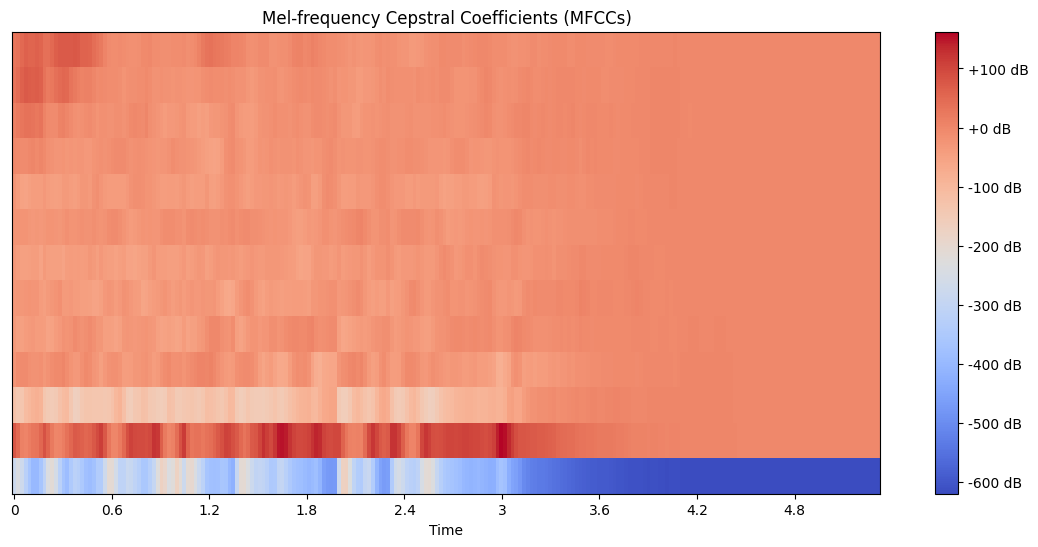

In [23]:
# Compute MFCCs
n_mfcc = 13
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

# Visualize MFCCs
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency Cepstral Coefficients (MFCCs)')
plt.show()

如何解读 MFCC 图：

- x 轴表示时间。  
- y 轴表示 MFCC 系数（通常为 13 个，包括第 0 个系数）。  
- 颜色的强度表示每个时间点上各个系数的幅值大小。  
- 较低的系数（图的下部）代表整体的频谱包络，而较高的系数则代表更精细的频谱细节。

### 分析单个 MFCC 系数

让我们看看各个 MFCC 系数随时间的变化情况：

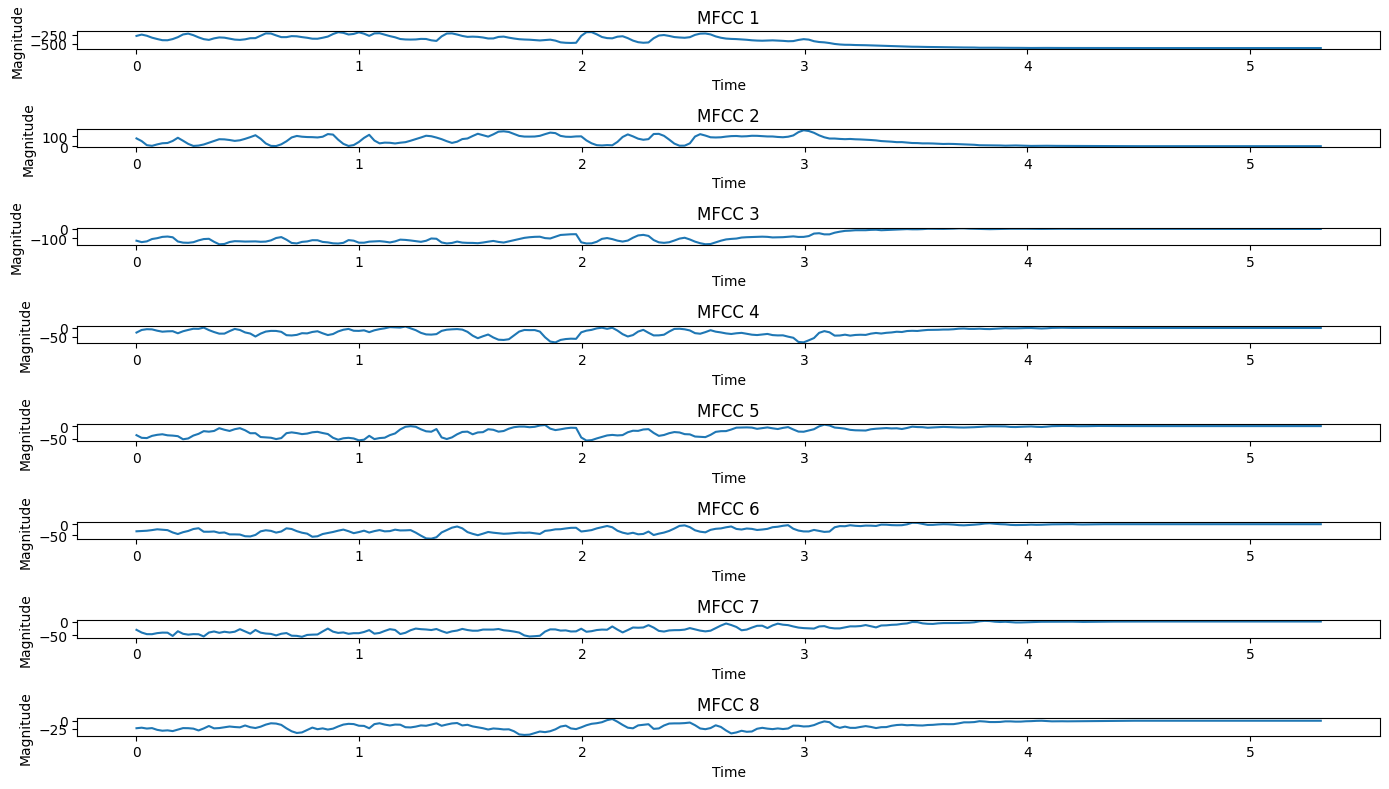

In [28]:
plt.figure(figsize=(14, 8))
for i in range(8):  # Plot first 4 MFCCs
    plt.subplot(8, 1, i+1)
    plt.plot(librosa.times_like(mfccs), mfccs[i])
    plt.title(f'MFCC {i+1}')
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

观察结果：

- **MFCC 1** 通常与信号的整体能量相关。  
- 更高阶的 MFCC 系数代表越来越精细的频谱细节。  
- 这些系数随时间的变化反映了音频频谱特性的动态变化。

(audio_features:mfccs:delta)=
### Delta 和 Delta-Delta MFCC

除了静态的 MFCC 值之外，计算其一阶和二阶时间导数（称为 **Delta** 和 **Delta-Delta**，或加速度系数）也常常很有用。这些系数能够捕捉 MFCC 随时间变化的趋势。

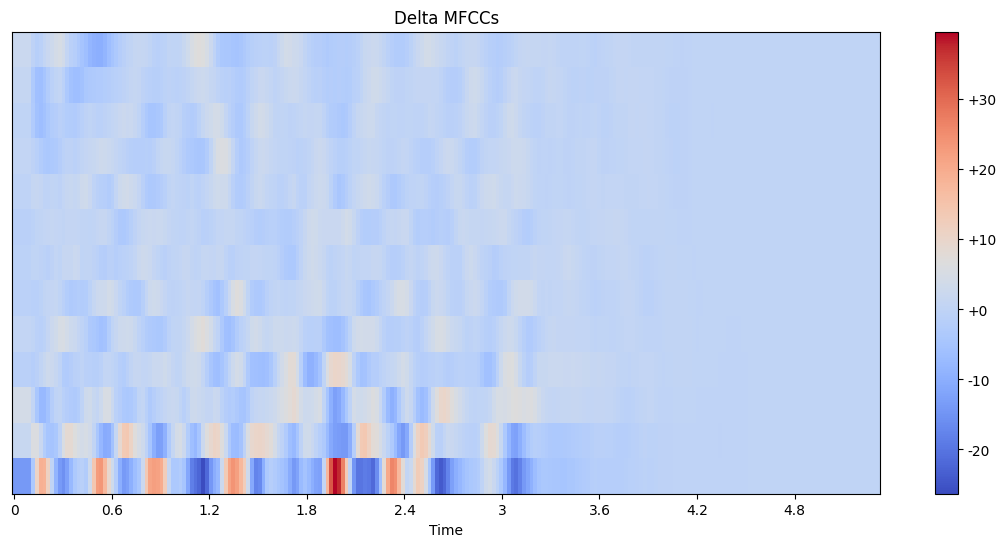

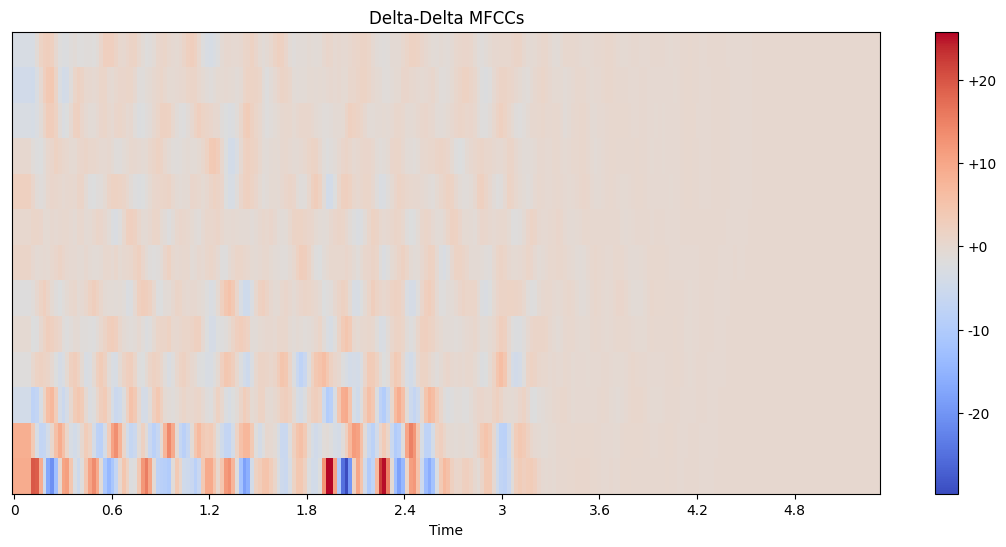

In [29]:
# Compute delta and delta-delta MFCCs
mfccs_delta = librosa.feature.delta(mfccs)
mfccs_delta2 = librosa.feature.delta(mfccs, order=2)

# Visualize delta MFCCs
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfccs_delta, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Delta MFCCs')
plt.show()

# Visualize delta-delta MFCCs
plt.figure(figsize=(14, 6))
librosa.display.specshow(mfccs_delta2, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f')
plt.title('Delta-Delta MFCCs')
plt.show()

解读 Delta 和 Delta-Delta MFCC：

- **Delta MFCC** 表示 MFCC 系数随时间的变化率。  
- **Delta-Delta MFCC** 表示 MFCC 系数的加速度。  
- 这些特征能够捕捉音频中动态变化的信息，而这些是静态 MFCC 可能无法体现的。

### MFCC 的统计信息

在机器学习应用中，我们通常需要对这些时变特征进行汇总。现在我们来计算一些基本的统计量：

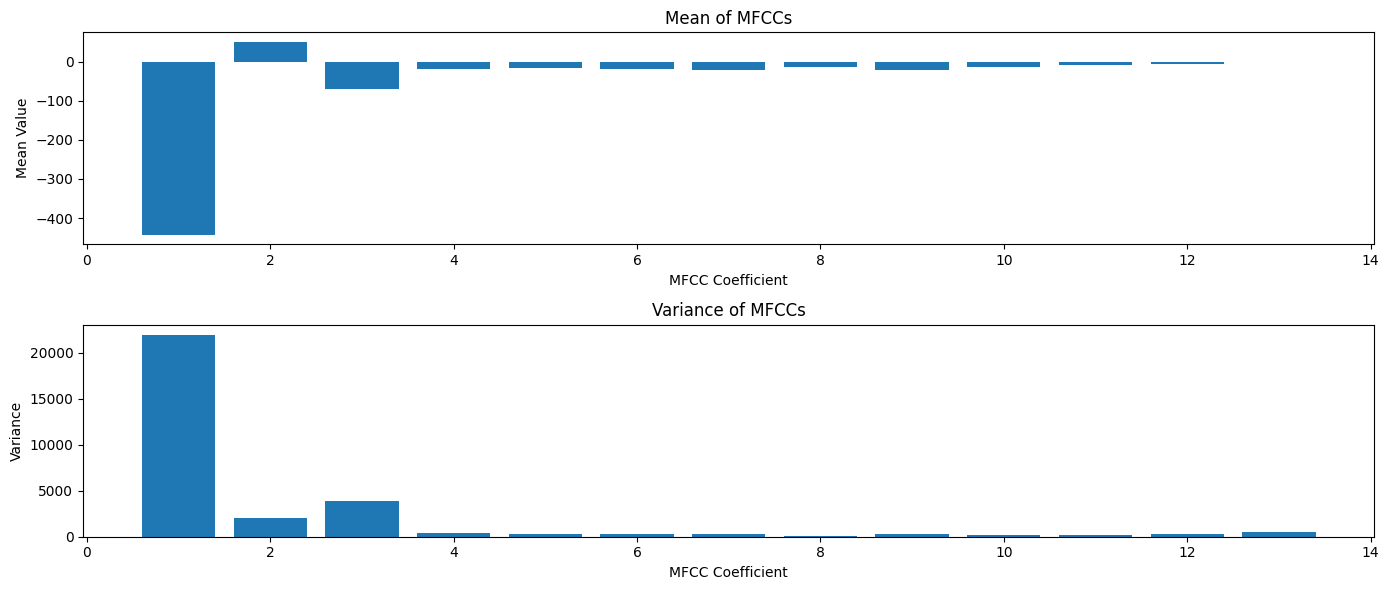

In [25]:
# Calculate statistics
mfcc_means = np.mean(mfccs, axis=1)
mfcc_vars = np.var(mfccs, axis=1)
delta_means = np.mean(mfccs_delta, axis=1)
delta_vars = np.var(mfccs_delta, axis=1)

# Display statistics
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.bar(range(1, n_mfcc + 1), mfcc_means)
plt.title('Mean of MFCCs')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Mean Value')

plt.subplot(2, 1, 2)
plt.bar(range(1, n_mfcc + 1), mfcc_vars)
plt.title('Variance of MFCCs')
plt.xlabel('MFCC Coefficient')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()

### MFCC 的应用

MFCC 被广泛应用于各种音频处理任务中，包括：

- **语音识别**：MFCC 能够捕捉语音信号的重要特征。  
- **说话人识别**：MFCC 所捕获的频谱形状有助于区分不同的说话人。  
- **音乐流派分类**：MFCC 提供了对音色的紧凑表示，适用于流派分析。  
- **音频相似度测量**：MFCC 可用于计算音频片段之间的相似性。  
- **语音情感识别**：MFCC 捕捉的频谱特性与情感内容相关。  
- **音频分词（Tokenization）**：MFCC 常被用作音频分词和压缩的输入特征，这些特征可用于将音频片段表示为“token”。

### MFCC 的局限性

尽管 MFCC 很强大，但它也有一些局限性：

- 它会丢弃相位信息，在某些应用中这可能是重要的信息。  
- 由于最初是为语音设计的，它们可能无法完全捕捉音乐分析中的所有相关信息。  
- 它们对背景噪声比较敏感。

尽管存在这些限制，由于 MFCC 在捕捉音频频谱特性方面的有效性，它仍然是许多音频处理任务中的热门选择。

### 本节小结

- **梅尔频率倒谱系数（MFCCs）** 提供了一种紧凑且与人类听觉感知相关的音频表示方式。  
- 它以一种与人类听觉系统密切相关的方式捕捉声音的频谱包络。  
- 加上其 **Delta** 和 **Delta-Delta** 变体后，MFCC 构成了一个强大的音频分析特征集合。  
- 如果你想更深入了解 MFCC，这里有一个很棒的视频：[轻松理解 MFCC](https://www.youtube.com/watch?v=4_SH2nfbQZ8)

在本节中，我们学习了如何：

- 计算并可视化 MFCC  
- 分析单个 MFCC 系数  
- 计算 Delta 和 Delta-Delta MFCC  
- 使用基本统计方法汇总 MFCC  

在下一节中，我们将探讨**Chroma 特征**，它们特别适用于分析音乐中的和声与调性内容。

## Chroma 特征

Chroma 特征，也称为 *音高类轮廓（Pitch Class Profiles）*，是分析音乐中和声与调性内容的强大工具。它们特别适用于涉及音高和和声分析的任务，例如和弦识别、调式检测以及音乐相似度估计。

### 理解 Chroma 特征

Chroma 特征表示音频信号中 **12 个音高类**（C、C#、D、D#、E、F、F#、G、G#、A、A#、B）的强度，不考虑八度。这使得它们非常适合用于分析音乐的和声与旋律特性。

关键概念：

- **音高类（Pitch class）**：所有具有相同音名的音高（例如不同八度中的所有 C 音）。  
- **八度不变性（Octave invariance）**：Chroma 特征会将每个音高类在所有八度上的能量进行汇总。

现在我们来计算并可视化 Chroma 特征：

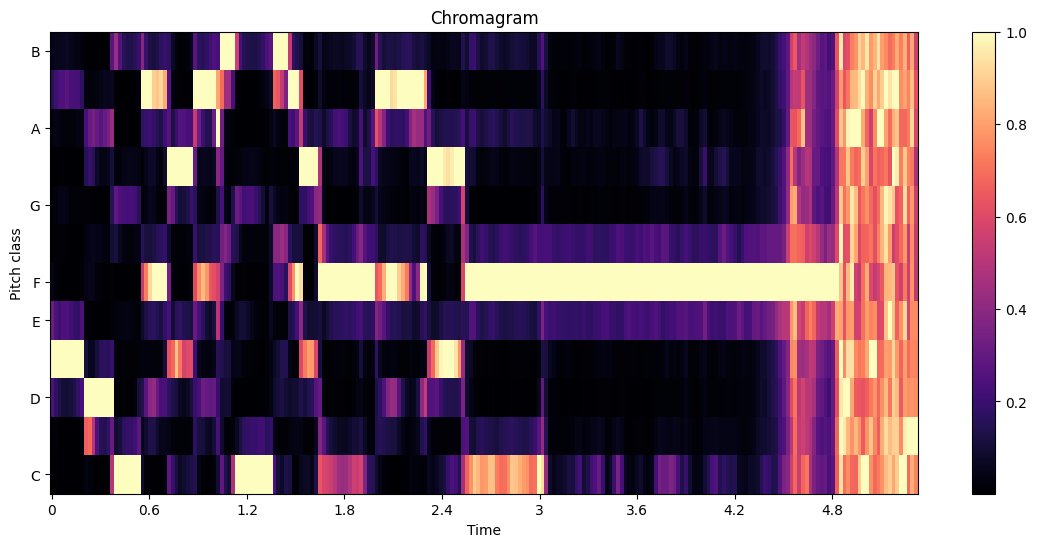

In [30]:
# Compute chroma features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)

# Visualize chroma features
plt.figure(figsize=(14, 6))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')
plt.show()

如何解读 Chromagram（音高类图）：

- **x 轴** 表示时间。  
- **y 轴** 表示 12 个音高类 **(C, C#, D, D#, E, F, F#, G, G#, A, A#, B)**。  
- **颜色的强度** 表示在每个时间点上各个音高类的相对强度。  
- **颜色越亮**，表示该音高类在当前时间点的存在越强。

### 分析随时间变化的 Chroma 特征

让我们看看每个音高类的强度是如何随时间变化的：

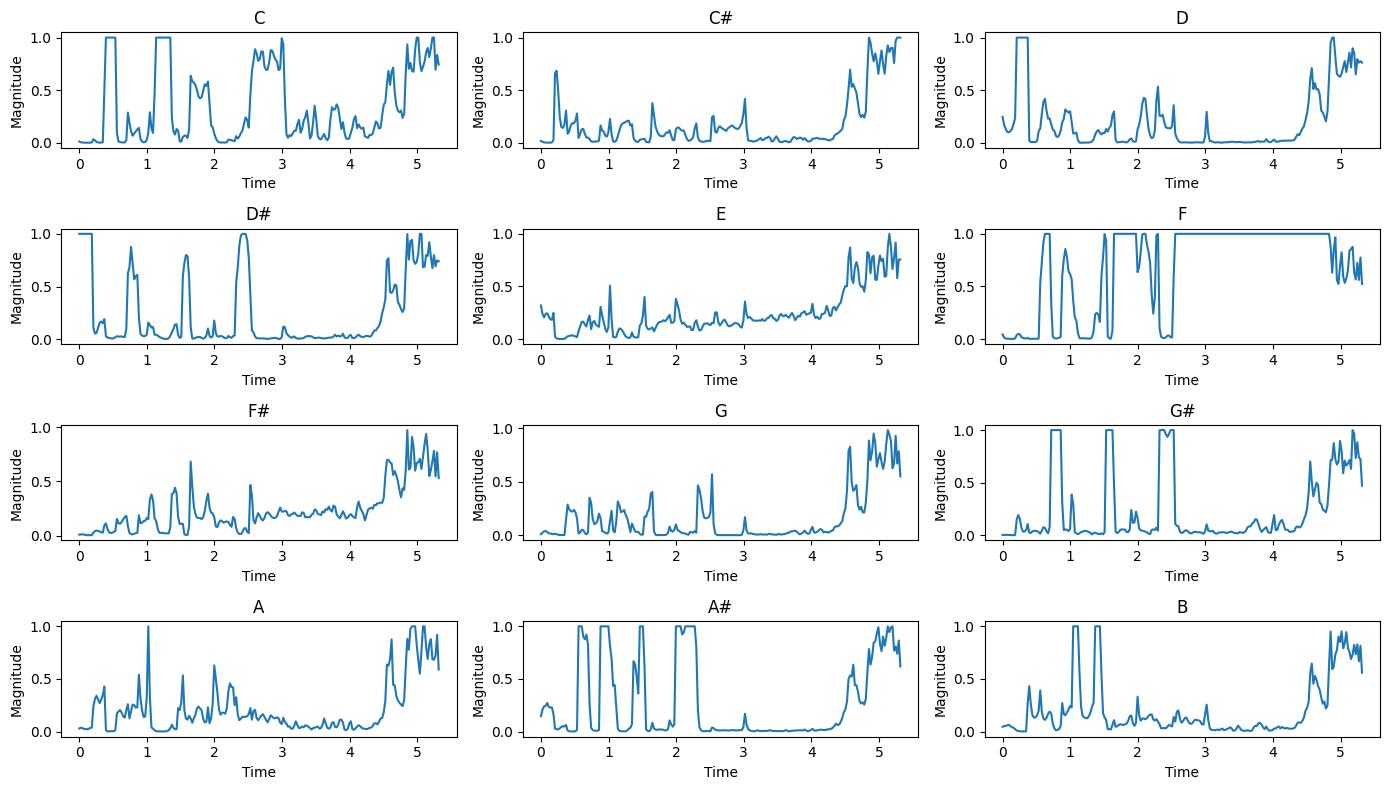

In [31]:
# Define pitch classes
pitch_classes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']

plt.figure(figsize=(14, 8))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.plot(librosa.times_like(chroma), chroma[i])
    plt.title(pitch_classes[i])
    plt.xlabel('Time')
    plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()


观察结果：

- 这些图中的峰值表示相应音高类的强烈存在。  
- 图案可以揭示音乐中的旋律和和声结构。  
- 持续较高的值可能表示音乐的调性或突出的和弦。

### Chroma Energy Normalized Statistics（CENS）

**CENS 特征** 是一种改进型的 Chroma 特征，对动态和音色变化具有更强的鲁棒性。它们通过额外的处理步骤实现，包括局部能量归一化和量化。

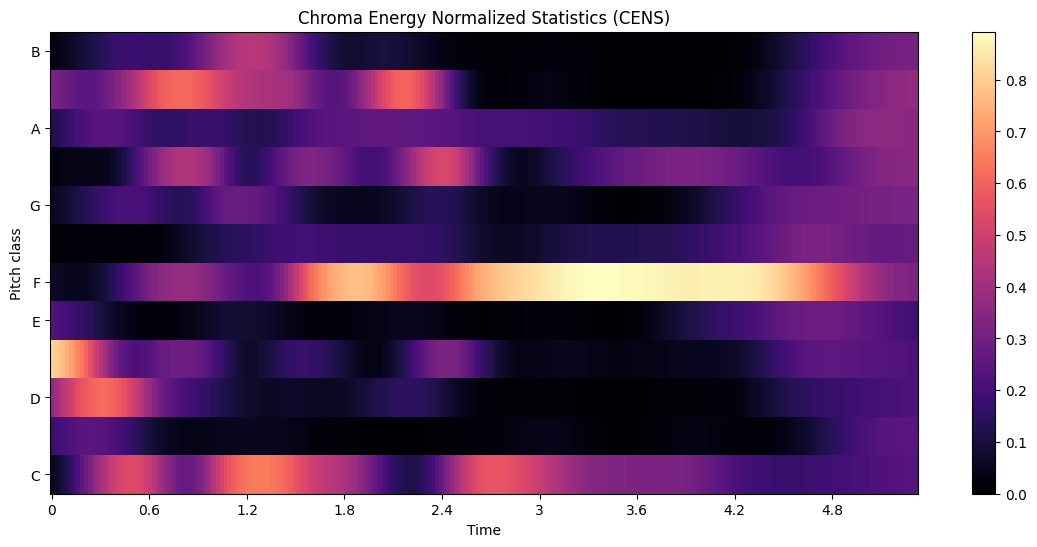

In [32]:
# Compute CENS features
cens = librosa.feature.chroma_cens(y=y, sr=sr)

# Visualize CENS features
plt.figure(figsize=(14, 6))
librosa.display.specshow(cens, sr=sr, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title('Chroma Energy Normalized Statistics (CENS)')
plt.show()

CENS 特征通常能提供更平滑的和声内容表示，这对于音频匹配和翻唱歌曲识别等任务是有益的。

### 不同 Hop Length 下的 Chroma 特征

通过调整 **hop length（帧移）** 可以改变 Chroma 特征的时间分辨率。让我们来比较使用不同 hop length 计算出的 Chroma 特征：

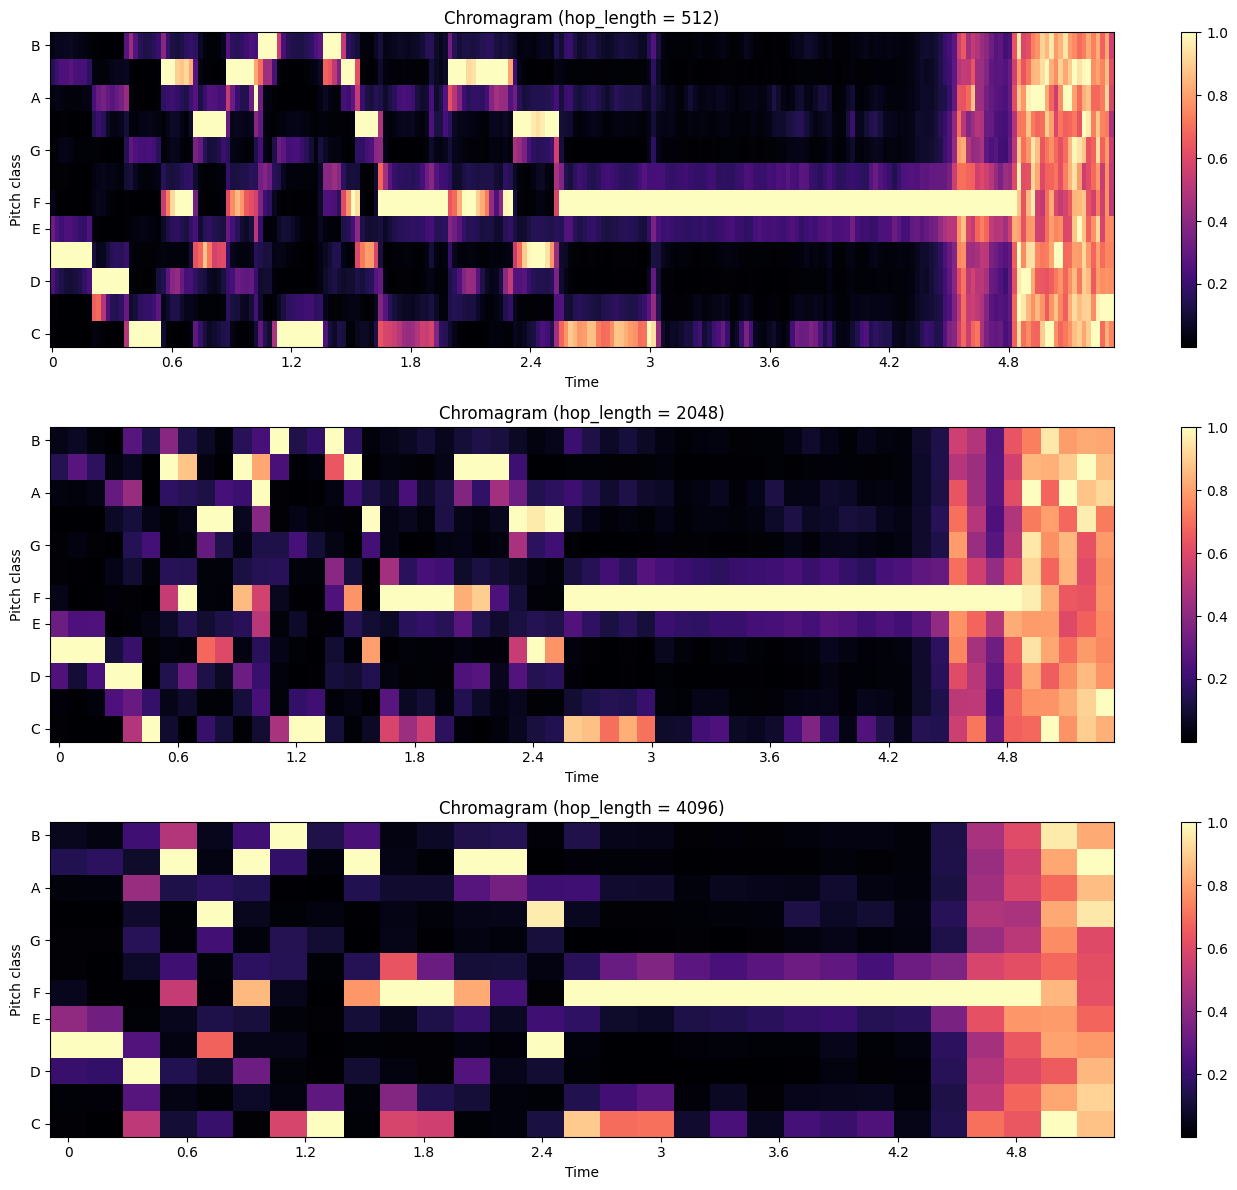

In [33]:
hop_lengths = [512, 2048, 4096]
plt.figure(figsize=(14, 12))

for i, hop_length in enumerate(hop_lengths):
    chroma = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length)
    plt.subplot(3, 1, i+1)
    librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', hop_length=hop_length)
    plt.colorbar()
    plt.title(f'Chromagram (hop_length = {hop_length})')

plt.tight_layout()
plt.show()

观察结果：

- **较小的 hop length** 提供更高的时间分辨率，但可能对噪声更敏感。  
- **较大的 hop length** 提供更平滑的表示，但可能会遗漏快速变化的信息。  
- hop length 的选择取决于具体应用和音频信号的性质。

### Chroma 特征的统计信息

与其他特征一样，使用统计方法来汇总 Chroma 特征通常也很有帮助。现在我们来计算 Chroma 特征的均值和方差：

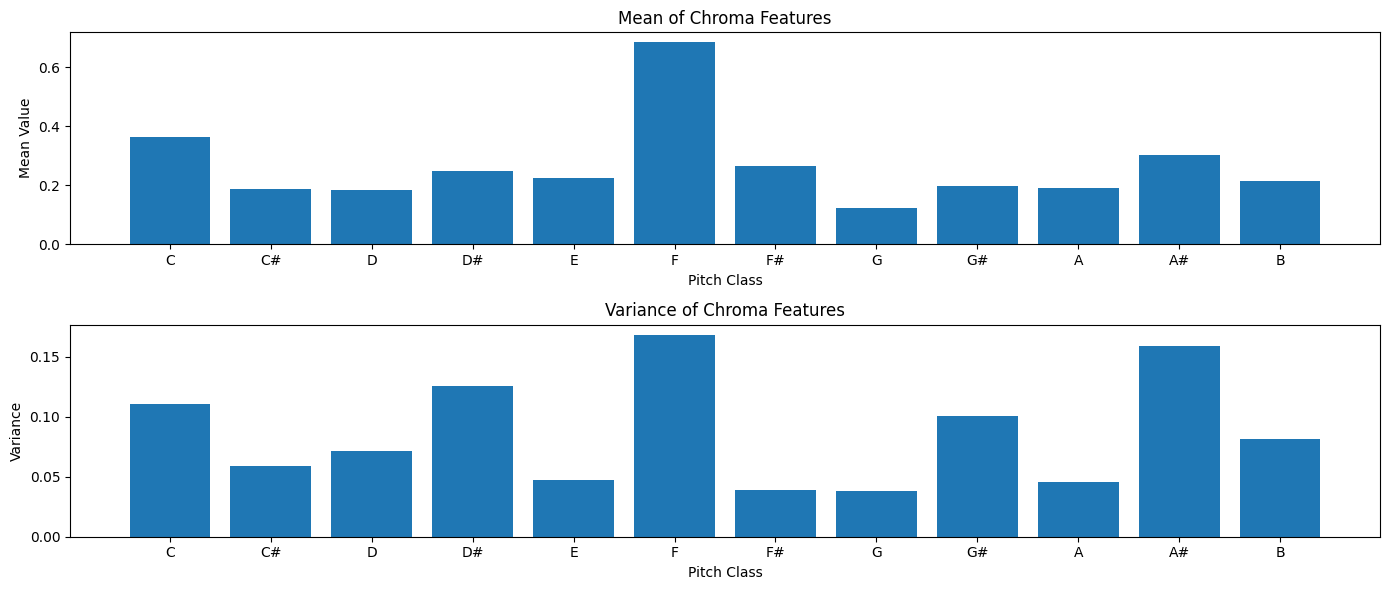

In [34]:
# Calculate statistics
chroma_means = np.mean(chroma, axis=1)
chroma_vars = np.var(chroma, axis=1)

# Display statistics
plt.figure(figsize=(14, 6))
plt.subplot(2, 1, 1)
plt.bar(pitch_classes, chroma_means)
plt.title('Mean of Chroma Features')
plt.xlabel('Pitch Class')
plt.ylabel('Mean Value')

plt.subplot(2, 1, 2)
plt.bar(pitch_classes, chroma_vars)
plt.title('Variance of Chroma Features')
plt.xlabel('Pitch Class')
plt.ylabel('Variance')

plt.tight_layout()
plt.show()

### Chroma 特征的应用

Chroma 特征被广泛应用于各种音乐信息检索任务中，包括：

- **和弦识别（Chord Recognition）**：识别一首歌曲中演奏的和弦。  
- **调式检测（Key Detection）**：确定歌曲的调式（如 C 大调、A 小调等）。  
- **音乐结构分析（Music Structure Analysis）**：识别重复段落、主歌-副歌结构等。  
- **翻唱歌曲识别（Cover Song Identification）**：找出同一首歌曲的不同版本。  
- **音乐相似度测量（Music Similarity Measurement）**：比较不同音乐作品的和声内容。  
- **旋律提取（Melody Extraction）**：在多声部音乐中分离出主要旋律线。

### Chroma 特征的局限性

尽管 Chroma 特征非常强大，但它们也存在一些限制：

- 它们丢弃了八度信息，这对于某些应用可能很重要。  
- 它们无法捕捉非和声方面的音乐特征，例如节奏或音色。  
- 它们可能会受到打击乐器或其他无固定音高的声音的影响。  
- 它们假设使用的是十二平均律（Equal Temperament），因此可能无法准确表示采用不同调音体系的传统音乐。

### 本节小结

- Chroma 特征为音乐中的和声与调性内容提供了强大的表示方式。  
- 它们捕获了随时间变化的音高类分布信息，这对许多音乐分析任务至关重要。  
- 由于对八度变化具有不变性，它们提供了一种紧凑且信息丰富的音乐内容表示形式。

在本节中，我们学习了如何：

- 计算并可视化 Chroma 特征  
- 分析 Chroma 特征随时间的变化  
- 计算 Chroma Energy Normalized Statistics（CENS）  
- 比较使用不同 hop length 的 Chroma 特征  
- 使用基本统计方法汇总 Chroma 特征  

结合我们之前探讨的其他音频特征（如用于音色分析的 MFCC 和用于整体频谱内容的谱特征），Chroma 特征构成了音频与音乐分析的全面工具集的一部分。

下一步的音频特征提取工作可能包括探索针对特定任务的更专业特征，或者研究如何有效地组合不同特征，以提升在音乐信息检索和音频分析中的表现。

## 实践应用：组合音频特征

在实际的音频处理应用中，通常将多种类型的特征结合起来，以捕捉音频信号的不同方面。这有助于为机器学习模型和其他分析任务提供更稳健、更具信息量的表示。

以下是一个示例，展示了如何将我们在本教程中探讨的各类特征进行组合：

In [35]:
def extract_features(y, sr):
    """
    Extract various audio features from an audio signal.
    
    Parameters:
    y (np.ndarray): Audio time series
    sr (int): Sampling rate
    
    Returns:
    dict: Dictionary of extracted features
    """
    features = {}
    
    # Time-domain features
    features['rms'] = librosa.feature.rms(y=y).mean()
    features['zcr'] = librosa.feature.zero_crossing_rate(y).mean()
    
    # Frequency-domain features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    features['spectral_centroid'] = spectral_centroid.mean()
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    features['spectral_rolloff'] = spectral_rolloff.mean()
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i, mfcc in enumerate(mfccs):
        features[f'mfcc_{i+1}'] = mfcc.mean()
    
    # Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    for i, pitch_class in enumerate(pitch_classes):
        features[f'chroma_{pitch_class}'] = chroma[i].mean()
    
    return features

# Extract features from the audio file
audio_features = extract_features(y, sr)
df = pd.DataFrame([audio_features]) # Convert to DataFrame.

df.T

,0
rms,0.052861
zcr,0.173491
spectral_centroid,2638.397725
spectral_rolloff,4410.983038
mfcc_1,-442.257904
mfcc_2,50.383907
mfcc_3,-70.578911
mfcc_4,-18.441647
mfcc_5,-16.287895
mfcc_6,-18.831701


在提取完特征后，我们沿着特征轴将它们拼接起来，形成一个综合的特征矩阵。这个矩阵可以作为机器学习模型、聚类算法或其他音频处理任务的输入。

### 组合音频特征的建议

在使用组合特征时，请注意以下几点：

- **维度灾难（Curse of Dimensionality）**：随着特征数量的增加，为了做出统计上可靠的推断所需的数据量呈指数级增长。

- **特征选择（Feature Selection）**：并非所有特征都对你的特定任务相关。特征选择技术可以帮助识别最具信息量的特征。

- **计算复杂度（Computational Complexity）**：提取和处理大量特征可能会带来较高的计算开销，尤其是在实时应用中。

- **可解释性（Interpretability）**：虽然组合特征可以提升性能，但它们可能使结果在音频特性方面的解释变得更加困难。

根据具体的音频分析任务，你可以以不同的方式组合特征：

- **语音识别（Speech Recognition）**：将 MFCC 与 Delta 和 Delta-Delta 系数、能量特征以及音高相关的特征进行组合。

- **音乐流派分类（Music Genre Classification）**：将 MFCC 与 Chroma 特征、频谱特征和节奏特征进行组合。

- **说话人识别（Speaker Identification）**：使用 MFCC，同时结合共振峰频率、音高特征和语音质量指标。

- **情感识别（Emotion Recognition）**：将 MFCC 与韵律特征、音高调制特征和能量特征进行组合。

- **音频分词（Audio Tokenization）**：使用 [MFCCs](glossary:mfcc)、Delta [MFCCs](glossary:delta_mfccs) 和 [Delta-Delta MFCCs](glossary:delta_delta_mfccs) 作为如 [向量量化（VQ）](glossary:vq)、[VQ-VAE](glossary:vq_vae) 或 [隐马尔可夫模型（HMM）](glossary:hmm) 等分词模型的输入特征。

- **音乐生成（Music Generation）**：将 Chroma 特征与节奏特征、[MFCCs](glossary:mfcc) 和频谱特征进行组合，以捕捉音乐内容的不同方面。然后可以将这些特征作为 [变分自编码器（VAEs）](glossary:vae) 或 [生成对抗网络（GANs）](glossary:gan) 等生成模型的输入。

### 本节小结

将不同类型的音频特征进行组合，使我们能够更全面地表示音频信号。这可以提升各种音频分析任务的性能。然而，这也带来了特征选择、降维和解释性等方面的挑战。

特征提取与组合的过程通常是迭代的，涉及对不同特征集和分析技术的实验，以找到最适合特定音频分析任务的方法。

在继续探索音频特征的过程中，你可以考虑尝试以下更高级的技术：

- **基于深度学习的特征提取**（例如使用卷积神经网络）  
- **时频表示方法**，如常 Q 变换（Constant-Q Transform）或梅尔频谱图（Mel-spectrograms）  
- **基于领域知识的任务特定特征工程**

请记住，特征的选择及其组合方式应始终以你的音频分析任务的具体需求和数据集的特性为指导。

## 下一步

为了进一步加深你对音频特征提取的理解和应用，可以考虑探索以下内容：

- **高级特征提取技术**：
  - 常数 Q 变换（Constant-Q Transform）
  - Gamma 滤波器组（Gammatone Filterbanks）
  - 节奏分析中的时图（Tempogram）

- **基于音频特征的机器学习**：
  - 使用提取的特征实现分类器（例如 SVM、随机森林等）
  - 探索深度学习方法，如卷积神经网络（CNN）用于音频分类

- **实时音频特征提取**：
  - 在流式音频数据上实现特征提取

- **特征选择与工程**：
  - 研究针对特定任务选择最相关特征的技术
  - 基于领域知识创建自定义特征

- **音频数据增强**：
  - 探索用于增强音频数据的技术，以提升机器学习模型的性能

- **其他音频处理库**：
  - 尝试使用其他 Python 库，如 pyAudioAnalysis 或 essentia 进行音频特征提取

- **大规模音频分析**：
  - 将这些技术应用于更大的数据集
  - 探索分布式计算选项，用于处理大型音频集合

- **跨领域应用**：
  - 探讨音频特征如何与其他类型的数据（如文本、图像）结合，进行多模态分析

音频特征提取是一个丰富且不断发展的领域。请持续关注最新的研究和技术进展。在应对不同音频分析挑战的过程中，尝试新的方法并加以实践。

## References
- [Extracting Features from Audio Samples for Machine Learning](https://medium.com/hacking-media/extracting-features-from-audio-samples-for-machine-learning-7b6a9271984) - A beginner-friendly guide to audio feature extraction.
- [Audio Feature Extraction](https://devopedia.org/audio-feature-extraction) - Answers frequently asked questions about audio features.
- [Music Information Retrieval: Fundamentals and Applications](https://www.springer.com/gp/book/9783319219448) - A great book on music information retrieval techniques and applications.
- [librosa: Audio and Music Signal Analysis in Python](https://librosa.org/doc/main/index.html) - The official documentation for librosa, the library used in this tutorial.